# Data downloading

In [1]:
import statsmodels.formula.api as smf
from statsmodels.graphics.api import abline_plot
import pandas as pd
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
import os
puidata = os.getenv("PUIDATA")
if puidata is None:
    puidata=os.environ["PUIDATA"] = "%s/PUIdata"%os.getenv("HOME")

In [3]:
!curl https://data.cityofnewyork.us/api/views/j34j-vqvt/rows.csv?accessType=DOWNLOAD > FDNY.csv
# move the data
!mv FDNY.csv $PUIDATA
# read in the data with pandas
FDNY = pd.read_csv("%s/FDNY.csv"%os.getenv("PUIDATA"))
# delete irrelevant columns:
FDNY_1=FDNY.drop(['YEARMONTH','INCIDENTCLASSIFICATION', 'INCIDENTBOROUGH'],axis=1)
FDNY_1.head(3)

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  204k    0  204k    0     0   618k      0 --:--:-- --:--:-- --:--:--  620k


,INCIDENTCOUNT,AVERAGERESPONSETIME
0,40850,04:27
1,10709,04:32
2,8137,04:37


# Data cleaning

In [4]:
#Delete last invalid 336 rows:
for i in range(336):
    FDNY_1=FDNY_1.drop(FDNY_1.index[[4032]])
#delete other invalid rows:
j=0
for i in range(4032):
    if i%42==0:
        j=j+1
    else:
        FDNY_1=FDNY_1.drop(FDNY_1.index[[j]])

In [5]:
#Conversion time format:
def ts(t):
    m,s = t.strip().split(":")
    return int(m) * 60 + int(s)

k=0
for i in range (96):
    k=(i)*42
    FDNY_1.AVERAGERESPONSETIME[k]=ts(FDNY_1.AVERAGERESPONSETIME[k])

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python2/lib/python2.7/site-packages/ipykernel/__main__.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [6]:
temp = pd.DataFrame()
temp['y'] = FDNY_1.AVERAGERESPONSETIME
temp['x'] = FDNY_1.INCIDENTCOUNT

In [7]:
temp.sort_values('x', inplace=True)
temp = temp.astype(float)
t2 = temp.groupby(['x']).mean()

In [8]:
temp = pd.DataFrame()
temp['y'] = t2['y']
temp['x'] = t2.index
temp.head()

,y,x
x,,
34743.0,267.0,34743.0
35050.0,284.0,35050.0
36196.0,284.0,36196.0
36643.0,278.0,36643.0
36778.0,274.0,36778.0


In [9]:
mod = smf.ols(formula='y ~ x', data = temp).fit()

In [10]:
mod.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.429
Model:                            OLS   Adj. R-squared:                  0.423
Method:                 Least Squares   F-statistic:                     69.06
Date:                Tue, 06 Nov 2018   Prob (F-statistic):           8.11e-13
Time:                        10:59:24   Log-Likelihood:                -331.50
No. Observations:                  94   AIC:                             667.0
Df Residuals:                      92   BIC:                             672.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept    212.4629      8.676     24.488      0.000       195.231   229.695
x              0.0017      0.000      8.310      0.000         0.001     0.002
==============================================================================
Omnibus:                       16.799   Durbin-Watson:                   1.795
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               19.393
Skew:                           1.005   Prob(JB):                     6.15e-05
Kurtosis:                       3.953   Cond. No.                     4.42e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.42e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# Plot

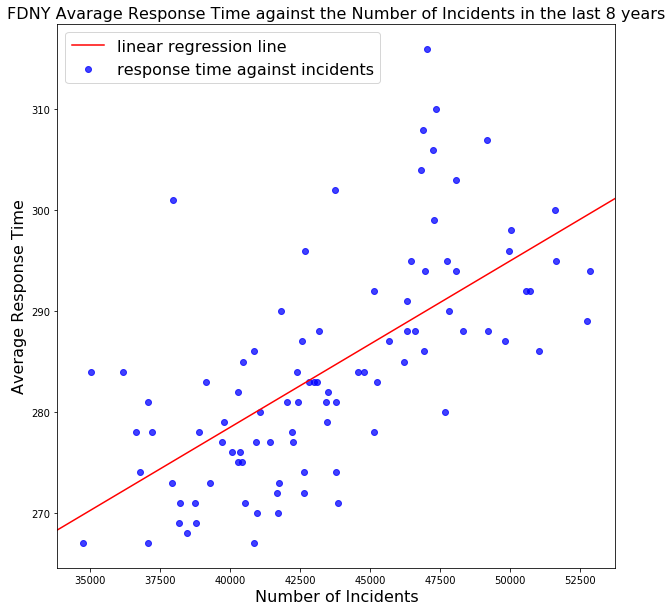

In [11]:
figure, ax = plt.subplots(figsize=(10,10))

ax.scatter(temp['x'],temp['y'], c="b", alpha=0.75)
abline_plot(model_results=mod, ax=ax, color='red')

ax.set_xlabel("Number of Incidents",fontsize=16)
ax.set_ylabel("Average Response Time",fontsize=16);
ax.set_title("FDNY Avarage Response Time against the Number of Incidents in the last 8 years",fontsize=16)
ax.legend(['linear regression line','response time against incidents'],fontsize=16)

## Figure 1: FDNY Avarage Response Time against the Number of Incidents in the last 8 years